# Multilayer Perceptrons
Here we are launching our exploration of deep neural networks with multilayer perceptrons concept.

## Hidden Layers

The affine transformation is a linear transformation added by a bias. This model mapped our inputs directly to our outputs via a single affine transformation, followed by a softmax operation. If our labels truly were related to our input data by an affine transformation,
then this approach would be sufficient. But linearity in affine transformations is a *strong* assumption.

### Linear Models May Go Wrong

For example, linearity implies the *weaker*
assumption of *monotonicity*:
that any increase in our feature must
either always cause an increase in our model's output
(if the corresponding weight is positive),
or always cause a decrease in our model's output
(if the corresponding weight is negative).
Sometimes that makes sense.
For example, if we were trying to predict
whether an individual will repay a loan,
we might reasonably imagine that holding all else equal,
an applicant with a higher income
would always be more likely to repay
than one with a lower income.
While monotonic, this relationship likely
is not linearly associated with the probability of
repayment. An increase in income from 0 to 50 thousand
likely corresponds to a bigger increase
in likelihood of repayment
than an increase from 1 million to 1.05 million.
One way to handle this might be to preprocess
our data such that linearity becomes more plausible,
say, by using the logarithm of income as our feature.


Note that we can easily come up with examples
that violate monotonicity.
Say for example that we want to predict probability
of death based on body temperature.
For individuals with a body temperature
above 37°C (98.6°F),
higher temperatures indicate greater risk.
However, for individuals with body temperatures
below 37° C, higher temperatures indicate lower risk!
In this case too, we might resolve the problem
with some clever preprocessing.
Namely, we might use the distance from 37°C as our feature.


But what about classifying images of cats and dogs?
Should increasing the intensity
of the pixel at location (13, 17)
always increase (or always decrease)
the likelihood that the image depicts a dog?
Reliance on a linear model corresponds to the implicit
assumption that the only requirement
for differentiating cats vs. dogs is to assess
the brightness of individual pixels.
This approach is doomed to fail in a world
where inverting an image preserves the category.


And yet despite the apparent absurdity of linearity here,
as compared with our previous examples,
it is less obvious that we could address the problem
with a simple preprocessing fix.
That is because the significance of any pixel
depends in complex ways on its context
(the values of the surrounding pixels).
While there might exist a representation of our data
that would take into account
the relevant interactions among our features,
on top of which a linear model would be suitable,
we simply do not know how to calculate it by hand.
With deep neural networks, we used observational data
to jointly learn both a representation via hidden layers
and a linear predictor that acts upon that representation.


### Incorporating Hidden Layers

We can overcome these limitations of linear models
and handle a more general class of functions
by incorporating one or more hidden layers.
The easiest way to do this is to stack
many fully-connected layers on top of each other.
Each layer feeds into the layer above it,
until we generate outputs.
We can think of the first $L-1$ layers
as our representation and the final layer
as our linear predictor.
This architecture is commonly called
a *multilayer perceptron*,
often abbreviated as *MLP*.

Since the input layer does not involve any calculations,
producing outputs with this network
requires implementing the computations
for both the hidden and output layers;
thus, the number of layers in this MLP is 2.
Note that these layers are both fully connected.
Every input influences every neuron in the hidden layer,
and each of these in turn influences
every neuron in the output layer.
However, the parameterization cost of MLPs
with fully-connected layers
can be prohibitively high,
which may motivate
tradeoff between parameter saving and model effectiveness even without changing the input or output size :cite:`Zhang.Tay.Zhang.ea.2021`.



### From Linear to Nonlinear


As before, by the matrix $\mathbf{X} \in \mathbb{R}^{n \times d}$,
we denote a minibatch of $n$ examples where each example has $d$ inputs (features).
For a one-hidden-layer MLP whose hidden layer has $h$ hidden units,
denote by $\mathbf{H} \in \mathbb{R}^{n \times h}$
the outputs of the hidden layer, which are
*hidden representations*.
In mathematics or code, $\mathbf{H}$ is also known as a *hidden-layer variable* or a *hidden variable*.
Since the hidden and output layers are both fully connected,
we have hidden-layer weights $\mathbf{W}^{(1)} \in \mathbb{R}^{d \times h}$ and biases $\mathbf{b}^{(1)} \in \mathbb{R}^{1 \times h}$
and output-layer weights $\mathbf{W}^{(2)} \in \mathbb{R}^{h \times q}$ and biases $\mathbf{b}^{(2)} \in \mathbb{R}^{1 \times q}$.
Formally, we calculate the outputs $\mathbf{O} \in \mathbb{R}^{n \times q}$
of the one-hidden-layer MLP as follows:

$$
\begin{aligned}
    \mathbf{H} & = \mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}, \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.
\end{aligned}
$$



Note that after adding the hidden layer,
our model now requires us to track and update
additional sets of parameters.
So what have we gained in exchange?
You might be surprised to find out
that---in the model defined above---*we
gain nothing for our troubles*!
The reason is plain.
The hidden units above are given by
an affine function of the inputs,
and the outputs (pre-softmax) are just
an affine function of the hidden units.
An affine function of an affine function
is itself an affine function.
Moreover, our linear model was already
capable of representing any affine function.


We can view the equivalence formally
by proving that for any values of the weights,
we can just collapse out the hidden layer,
yielding an equivalent single-layer model with parameters
$\mathbf{W} = \mathbf{W}^{(1)}\mathbf{W}^{(2)}$ and $\mathbf{b} = \mathbf{b}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)}$:

$$
\mathbf{O} = (\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})\mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W}^{(1)}\mathbf{W}^{(2)} + \mathbf{b}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W} + \mathbf{b}.
$$


In order to realize the potential of multilayer architectures,
we need one more key ingredient: a
nonlinear *activation function* $\sigma$
to be applied to each hidden unit
following the affine transformation.
The outputs of activation functions
(e.g., $\sigma(\cdot)$)
are called *activations*.
In general, with activation functions in place,
it is no longer possible to collapse our MLP into a linear model:


$$
\begin{aligned}
    \mathbf{H} & = \sigma(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}), \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.\\
\end{aligned}
$$

Since each row in $\mathbf{X}$ corresponds to an example in the minibatch,
with some abuse of notation, we define the nonlinearity
$\sigma$ to apply to its inputs in a rowwise fashion,
i.e., one example at a time.
Note that we used the notation for softmax
in the same way to denote a rowwise operation.
Often, as in this section, the activation functions
that we apply to hidden layers are not merely rowwise,
but elementwise.
That means that after computing the linear portion of the layer,
we can calculate each activation
without looking at the values taken by the other hidden units.
This is true for most activation functions.


To build more general MLPs, we can continue stacking
such hidden layers,
e.g., $\mathbf{H}^{(1)} = \sigma_1(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})$
and $\mathbf{H}^{(2)} = \sigma_2(\mathbf{H}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)})$,
one atop another, yielding ever more expressive models.

### Universal Approximators

MLPs can capture complex interactions
among our inputs via their hidden neurons,
which depend on the values of each of the inputs.
We can easily design hidden nodes
to perform arbitrary computation,
for instance, basic logic operations on a pair of inputs.
Moreover, for certain choices of the activation function,
it is widely known that MLPs are universal approximators.
Even with a single-hidden-layer network,
given enough nodes (possibly absurdly many),
and the right set of weights,
we can model any function,
though actually learning that function is the hard part.
You might think of your neural network
as being a bit like the C programming language.
The language, like any other modern language,
is capable of expressing any computable program.
But actually coming up with a program
that meets your specifications is the hard part.

Moreover, just because a single-hidden-layer network
*can* learn any function
does not mean that you should try
to solve all of your problems
with single-hidden-layer networks.
In fact, we can approximate many functions
much more compactly by using deeper (vs. wider) networks.
We will touch upon more rigorous arguments in subsequent chapters.


## Activation Functions

Activation functions decide whether a neuron should be activated or not by
calculating the weighted sum and further adding bias with it.
They are differentiable operators to transform input signals to outputs,
while most of them add non-linearity.
Because activation functions are fundamental to deep learning,
(**let us briefly survey some common activation functions**).


In [ ]:
!pip install mxnet
!pip install d2l
%matplotlib inline
from mxnet import autograd, np, npx
from d2l import mxnet as d2l

npx.set_np()


     |████████████████████████████████| 82 kB 535 kB/s 
     |████████████████████████████████| 11.6 MB 50.4 MB/s 
     |████████████████████████████████| 9.9 MB 36.9 MB/s 
     |████████████████████████████████| 61 kB 6.7 MB/s 
     |████████████████████████████████| 20.1 MB 1.5 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the p

### ReLU Function

The most popular choice,
due to both simplicity of implementation and
its good performance on a variety of predictive tasks,
is the *rectified linear unit* (*ReLU*).
[**ReLU provides a very simple nonlinear transformation**].
Given an element $x$, the function is defined
as the maximum of that element and $0$:

$$\operatorname{ReLU}(x) = \max(x, 0).$$

Informally, the ReLU function retains only positive
elements and discards all negative elements
by setting the corresponding activations to 0.
To gain some intuition, we can plot the function.
As you can see, the activation function is piecewise linear.


     |████████████████████████████████| 13.1 MB 22.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.3
    Uninstalling matplotlib-3.3.3:
      Successfully uninstalled matplotlib-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
d2l 0.17.3 requires matplotlib==3.3.3, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


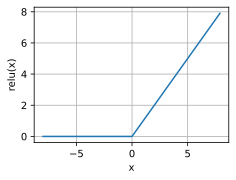

In [ ]:
!pip install matplotlib==3.1.3
x = np.arange(-8.0, 8.0, 0.1)
x.attach_grad()
with autograd.record():
    y = npx.relu(x)
d2l.plot(x, y, 'x', 'relu(x)')

When the input is negative,
the derivative of the ReLU function is 0,
and when the input is positive,
the derivative of the ReLU function is 1.
Note that the ReLU function is not differentiable
when the input takes value precisely equal to 0.
In these cases, we default to the left-hand-side
derivative and say that the derivative is 0 when the input is 0.
We can get away with this because
the input may never actually be zero.
There is an old adage that if subtle boundary conditions matter,
we are probably doing (*real*) mathematics, not engineering.
That conventional wisdom may apply here.
We plot the derivative of the ReLU function plotted below.


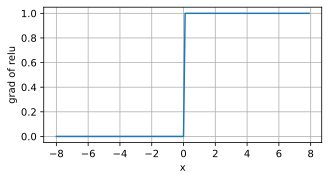

In [ ]:
y.backward()
d2l.plot(x, x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

The reason for using ReLU is that
its derivatives are particularly well behaved:
either they vanish or they just let the argument through.
This makes optimization better behaved
and it mitigated the well-documented problem
of vanishing gradients that plagued
previous versions of neural networks (more on this later).

Note that there are many variants to the ReLU function,
including the *parameterized ReLU* (*pReLU*) function :cite:`He.Zhang.Ren.ea.2015`.
This variation adds a linear term to ReLU,
so some information still gets through,
even when the argument is negative:

$$\operatorname{pReLU}(x) = \max(0, x) + \alpha \min(0, x).$$

### Sigmoid Function

[**The *sigmoid function* transforms its inputs**],
for which values lie in the domain $\mathbb{R}$,
(**to outputs that lie on the interval (0, 1).**)
For that reason, the sigmoid is
often called a *squashing function*:
it squashes any input in the range (-inf, inf)
to some value in the range (0, 1):

$$\operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$$

In the earliest neural networks, scientists
were interested in modeling biological neurons
which either *fire* or *do not fire*.
Thus the pioneers of this field,
going all the way back to McCulloch and Pitts,
the inventors of the artificial neuron,
focused on thresholding units.
A thresholding activation takes value 0
when its input is below some threshold
and value 1 when the input exceeds the threshold.


When attention shifted to gradient based learning,
the sigmoid function was a natural choice
because it is a smooth, differentiable
approximation to a thresholding unit.
Sigmoids are still widely used as
activation functions on the output units,
when we want to interpret the outputs as probabilities
for binary classification problems
(you can think of the sigmoid as a special case of the softmax).
However, the sigmoid has mostly been replaced
by the simpler and more easily trainable ReLU
for most use in hidden layers.
In later chapters on recurrent neural networks,
we will describe architectures that leverage sigmoid units
to control the flow of information across time.

Below, we plot the sigmoid function.
Note that when the input is close to 0,
the sigmoid function approaches
a linear transformation.


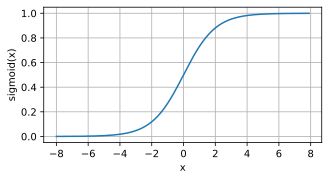

In [ ]:
with autograd.record():
    y = npx.sigmoid(x)
d2l.plot(x, y, 'x', 'sigmoid(x)', figsize=(5, 2.5))

The derivative of the sigmoid function is given by the following equation:

$$\frac{d}{dx} \operatorname{sigmoid}(x) = \frac{\exp(-x)}{(1 + \exp(-x))^2} = \operatorname{sigmoid}(x)\left(1-\operatorname{sigmoid}(x)\right).$$


The derivative of the sigmoid function is plotted below.
Note that when the input is 0,
the derivative of the sigmoid function
reaches a maximum of 0.25.
As the input diverges from 0 in either direction,
the derivative approaches 0.


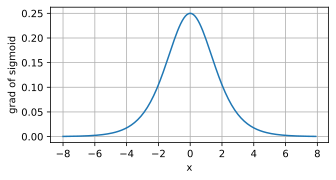

In [ ]:
y.backward()
d2l.plot(x, x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

### Tanh Function

Like the sigmoid function, [**the tanh (hyperbolic tangent)
function also squashes its inputs**],
transforming them into elements on the interval (**between -1 and 1**):

$$\operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$$

We plot the tanh function below.
Note that as the input nears 0, the tanh function approaches a linear transformation. Although the shape of the function is similar to that of the sigmoid function, the tanh function exhibits point symmetry about the origin of the coordinate system.


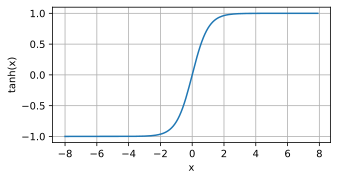

In [ ]:
with autograd.record():
    y = np.tanh(x)
d2l.plot(x, y, 'x', 'tanh(x)', figsize=(5, 2.5))

The derivative of the tanh function is:

$$\frac{d}{dx} \operatorname{tanh}(x) = 1 - \operatorname{tanh}^2(x).$$

The derivative of tanh function is plotted below.
As the input nears 0,
the derivative of the tanh function approaches a maximum of 1.
And as we saw with the sigmoid function,
as the input moves away from 0 in either direction,
the derivative of the tanh function approaches 0.


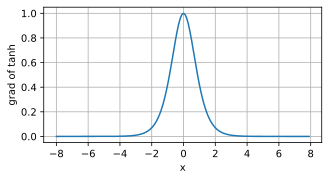

In [ ]:
y.backward()
d2l.plot(x, x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

In summary, we now know how to incorporate nonlinearities
to build expressive multilayer neural network architectures.
As a side note, your knowledge already
puts you in command of a similar toolkit
to a practitioner circa 1990.
In some ways, you have an advantage
over anyone working in the 1990s,
because you can leverage powerful
open-source deep learning frameworks
to build models rapidly, using only a few lines of code.
Previously, training these networks
required researchers to code up
thousands of lines of C and Fortran.

## Summary

* MLP adds one or multiple fully-connected hidden layers between the output and input layers and transforms the output of the hidden layer via an activation function.
* Commonly-used activation functions include the ReLU function, the sigmoid function, and the tanh function.